<a href="https://colab.research.google.com/github/MayarQasrawi/Computer-Vision/blob/main/EdgeDetection_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
lectuer 4

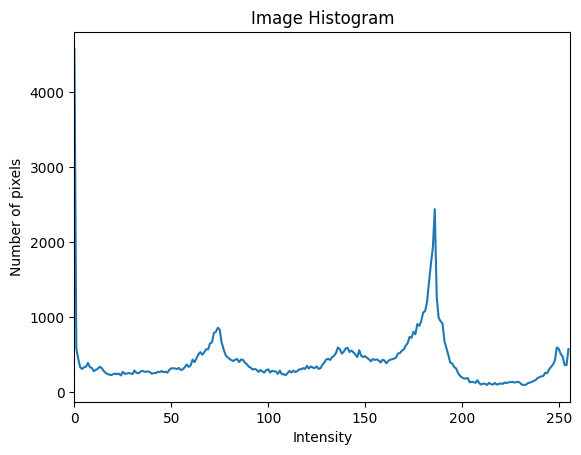

In [29]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

img = cv2.imread('/KOKO.jpg', 0)  # Load image in grayscale

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram (optional)
plt.plot(hist)
plt.title('Image Histogram')
plt.xlim([0, 256])
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
plt.show()



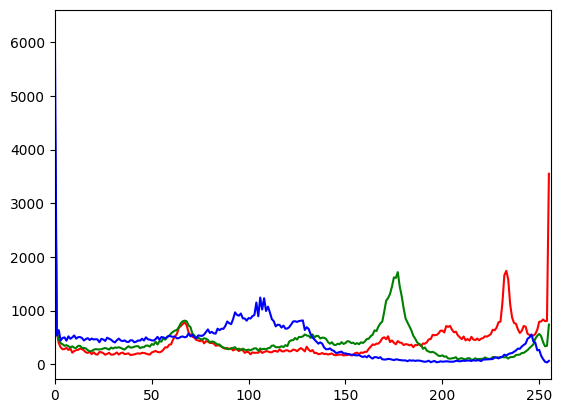

In [34]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

img = cv2.imread('/KOKO.jpg')  # Load image in grayscale
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

color=['r','g','b']
for i,col in enumerate(color):
    histr = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()




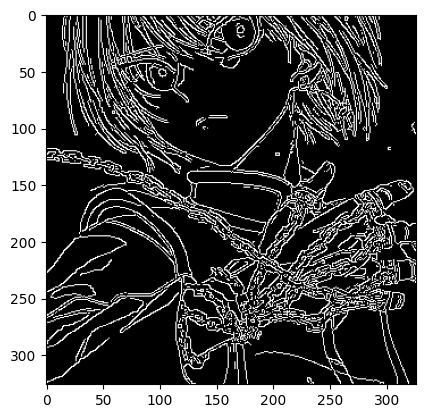

137.0


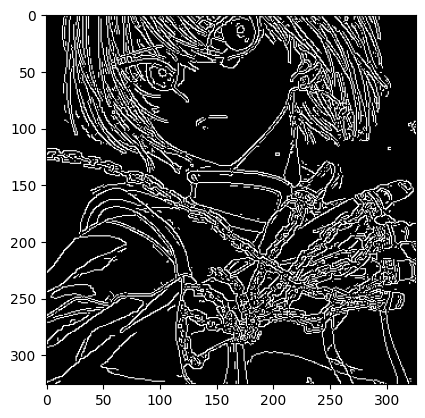

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/KOKO.jpg', 0)
v=np.median(img)
lower=int(0.68*v)
uppper= int(1.33*v)
edges= cv2.Canny(img,lower,uppper)
plt.imshow(edges,cmap='gray')
plt.show()
print(v)
cann= cv2.Canny(img,60,100)
plt.imshow(cann,cmap='gray')
plt.show()

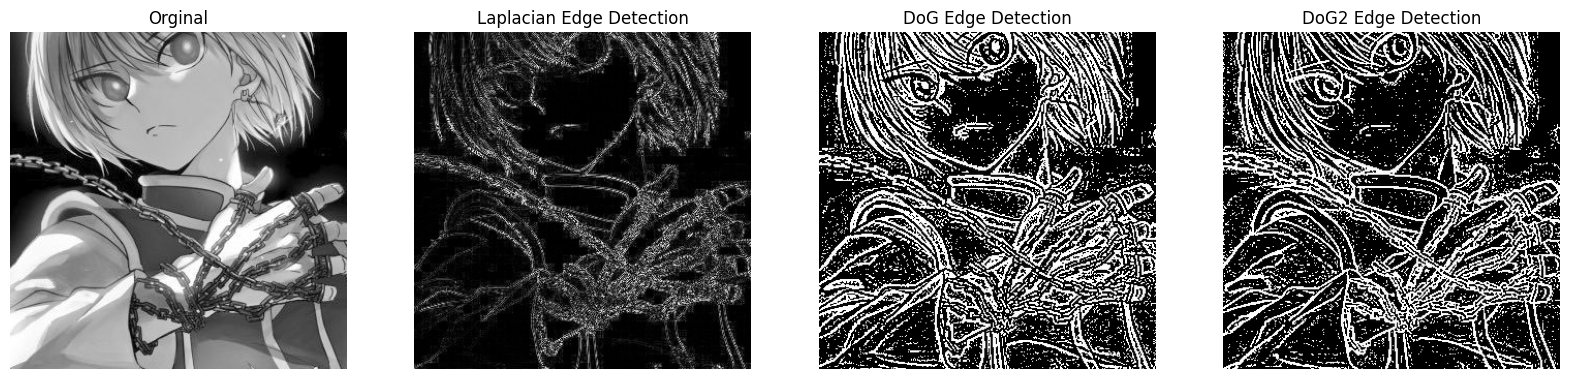

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/KOKO.jpg', 0)

# Apply Laplacian operator
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))



# Load the image
img = cv2.imread('/KOKO.jpg', 0)

# Apply Gaussian blur with different kernel sizes
blur1 = cv2.GaussianBlur(img, (5, 5), 0)
blur2 = cv2.GaussianBlur(img, (3, 3), 0)

# Compute DoG
DoG = blur1 - blur2
DoG2=blur2- blur1
plt.figure(figsize=(20,5))
plt.subplot(141), plt.imshow(img,cmap='gray'),plt.title('Orginal'),plt.axis('off')
plt.subplot(142),plt.imshow(laplacian, cmap='gray'),plt.title('Laplacian Edge Detection'),plt.axis('off')
plt.subplot(143),plt.imshow(DoG, cmap='gray'),plt.title('DoG Edge Detection'),plt.axis('off')
plt.subplot(144),plt.imshow(DoG2, cmap='gray'),plt.title('DoG2 Edge Detection'),plt.axis('off')
plt.show()

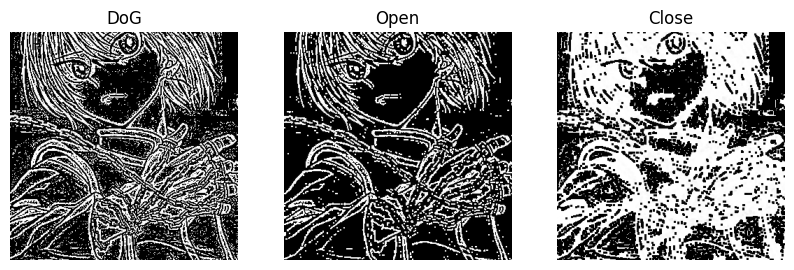

In [65]:
Kernel= np.ones((2,2),np.uint8)
kernel2= np.ones((3,3),np.uint8)
opend= cv2.morphologyEx(DoG,cv2.MORPH_OPEN,Kernel)
closing= cv2.morphologyEx(DoG, cv2.MORPH_CLOSE,kernel2)
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(DoG,cmap='gray'),plt.title('DoG'),plt.axis('off')
plt.subplot(132),plt.imshow(opend,cmap='gray'),plt.title('Open'),plt.axis('off')
plt.subplot(133),plt.imshow(closing,cmap='gray'),plt.title('Close'),plt.axis('off')


plt.show()


Live Stream camira in raspberry using to convert the video using canny  edge detection
> Note: Try this in local python for more Simplestly



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video= cv2.VideoCapture(0)
while True:
    ret,frame= video.read()
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges= cv2.canny(gray,90,170)
    # this line below just for formating  display in cv2
    edges_cvt= cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    combined =np.hstack('frame',edges_cvt)  # hstach= horizantal Stack
    cv2.imshow('combined',combined)
    if cv2.waitKey(1) & 0xFF == ord('q'):   # or if cv2.waitKey(1)  == ord('q'):
        break


video.release()
cv2.destroyAllWindows()


